# NetworkX tests 

* https://networkx.github.io/documentation/stable/reference/introduction.html
* https://pyvis.readthedocs.io/en/latest/tutorial.html

In [1]:
!pip install dimcli -U --quiet 
import dimcli
import json
dimcli.login()
dsl = dimcli.Dsl()

     |████████████████████████████████| 122kB 2.8MB/s eta 0:00:01
..running Google Colab auto-init..
DimCli v0.5.9.2 - Succesfully connected to <https://app.dimensions.ai> (method: dsl.ini file)


In [ ]:
from google.colab import files

In [57]:
!pip install pyvis --quiet
from pyvis.network import Network

In [ ]:
import networkx as nx

In [ ]:
seed = [ "pub.1053279155" , "pub.1103275659"]
q = """search publications where reference_ids in [{}] return publications[id+doi+title+year]"""
results = {}
for p in seed:
  data = dsl.query(q.format(json.dumps(p)))
  results[p] = [x['id'] for x in data.publications]

In [3]:
results

{'pub.1053279155': ['pub.1103275659',
  'pub.1012651711',
  'pub.1005502446',
  'pub.1008922470',
  'pub.1053157726'],
 'pub.1103275659': ['pub.1113878770', 'pub.1109815383', 'pub.1107354292']}

Wrapping this up into a function 

In [ ]:
from dimcli.shortcuts import dslquery

def get_citations(pubids, level=1):
  q = """search publications where reference_ids in [{}] return publications[id+doi+title+year]"""
  results = {}
  for p in pubids:
    data = dslquery(q.format(json.dumps(p)))
    results[p] = [x['id'] for x in data.publications]
  if level == 1:
    return results
  else:
    temp = []
    for x in results.values():
      temp += x
    temp = list(set(temp))
    return dict(results, **get_citations(temp, level-1))

def build_graph(dict_strut):
  G = nx.Graph()
  for x in dict_strut:
    G.add_node(x, seed=True)
    for y in dict_strut[x]:
      G.add_node(y)
      G.add_edge(x, y, level =1 )
  return G

In [38]:
get_citations(['pub.1053279155'], 2)

Returned Publications: 5 (total = 5)
Returned Publications: 3 (total = 3)
Returned Publications: 0
Returned Publications: 1 (total = 1)
Returned Publications: 6 (total = 6)
Returned Publications: 8 (total = 8)


{'pub.1005502446': [],
 'pub.1008922470': ['pub.1089701016',
  'pub.1026187633',
  'pub.1002394460',
  'pub.1012381129',
  'pub.1046653745',
  'pub.1016243129',
  'pub.1011600493',
  'pub.1028493614'],
 'pub.1012651711': ['pub.1101318936'],
 'pub.1053157726': ['pub.1109914120',
  'pub.1113063906',
  'pub.1099624152',
  'pub.1104531912',
  'pub.1011868512',
  'pub.1001626874'],
 'pub.1053279155': ['pub.1103275659',
  'pub.1012651711',
  'pub.1005502446',
  'pub.1008922470',
  'pub.1053157726'],
 'pub.1103275659': ['pub.1113878770', 'pub.1109815383', 'pub.1107354292']}

In [52]:
G = build_graph(get_citations(['pub.1053279155'], 3))

Returned Publications: 5 (total = 5)
Returned Publications: 3 (total = 3)
Returned Publications: 0
Returned Publications: 1 (total = 1)
Returned Publications: 6 (total = 6)
Returned Publications: 8 (total = 8)
Returned Publications: 1 (total = 1)
Returned Publications: 0
Returned Publications: 1 (total = 1)
Returned Publications: 0
Returned Publications: 0
Returned Publications: 0
Returned Publications: 1 (total = 1)
Returned Publications: 2 (total = 2)
Returned Publications: 0
Returned Publications: 4 (total = 4)
Returned Publications: 0
Returned Publications: 4 (total = 4)
Returned Publications: 4 (total = 4)
Returned Publications: 3 (total = 3)
Returned Publications: 3 (total = 3)
Returned Publications: 3 (total = 3)
Too Many Requests for the Server. Sleeping for 30 seconds and then retrying.
Returned Publications: 16 (total = 16)
Returned Publications: 2 (total = 2)


In [54]:
len(G)

62

In [ ]:
net = Network()
net.from_nx(G)

In [ ]:
net.show("test.html")

In [ ]:
files.download("test.html")

Aspects to get into

* recursion using sleep
* recursion with multi-ID query
* customizing the chart eg with title etc
* saving intermediate data to a dataframe, so that it can be reused later or even saved as CSV

## NetworkX

Adding two nodes with same ID results always in one node

In [ ]:
G = nx.Graph()

In [ ]:
for x in results:
  G.add_node(x, seed=True)
  for y in results[x]:
    G.add_node(y)
    G.add_edge(x, y, level =1 )


In [22]:
G.nodes()

NodeView(('pub.1053279155', 'pub.1103275659', 'pub.1012651711', 'pub.1005502446', 'pub.1008922470', 'pub.1053157726', 'pub.1113878770', 'pub.1109815383', 'pub.1107354292'))

In [21]:
sorted(G.nodes(),key=str)

['pub.1005502446',
 'pub.1008922470',
 'pub.1012651711',
 'pub.1053157726',
 'pub.1053279155',
 'pub.1103275659',
 'pub.1107354292',
 'pub.1109815383',
 'pub.1113878770']

In [ ]:
import matplotlib.pyplot as plt

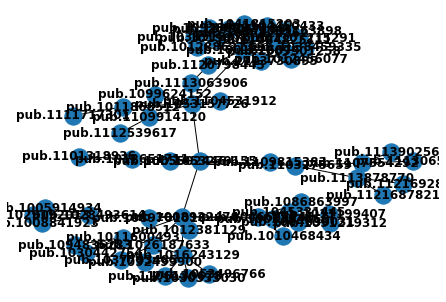

In [55]:
nx.draw(G, with_labels=True, font_weight='bold')

Adding edges will also results in nodes

In [ ]:
G = nx.Graph()
G.add_edge(1, 2, weight=1)
len(G.nodes()) # => 2

can add alll nodes in one go  - duplicates will be removed

In [ ]:
G.add_nodes_from(concepts['concept'].to_list())